# Pymaceuticals Inc.

### Analysis

- Capomulin might be a very promising drug and should be considered along with other lab results as a possible cure to the tumor based on the fact that it could reduce the tumor size significantly compared to other drugs
- Capomulin was also very succesful in keeping the subject alive over a longer period of time
- While Capomulin could not stop the metastatic spread , it definitely performed better than all the other drugs considered

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# read input files
clinicaltrial_df = pd.read_csv("clinicaltrial_data.csv")
mousedrug_df = pd.read_csv("mouse_drug_data.csv")

In [3]:
# Pivot table on Drug and Timepoint
clinical_mouse_df = pd.merge(clinicaltrial_df,mousedrug_df, on="Mouse ID")
clinical_mouse_pivotdf = pd.pivot_table(clinical_mouse_df,index=["Drug","Timepoint"])

In [4]:
# Flattening the multi index Dataframe
clinical_mouse_pivotdf1 = clinical_mouse_pivotdf
del clinical_mouse_pivotdf1["Metastatic Sites"]
unstacked_df = clinical_mouse_pivotdf1.unstack()
unstacked_df1 = unstacked_df.transpose()
unstacked_noindex = unstacked_df1.reset_index()

In [5]:
# standard error of mean for each drug's tumor volume
Capomulin_sem = stats.sem(unstacked_noindex["Capomulin"])
Infubinol_sem = stats.sem(unstacked_noindex["Infubinol"])
Ketapril_sem = stats.sem(unstacked_noindex["Ketapril"])
Placebo_sem = stats.sem(unstacked_noindex["Placebo"])

## Tumor Response to Treatment

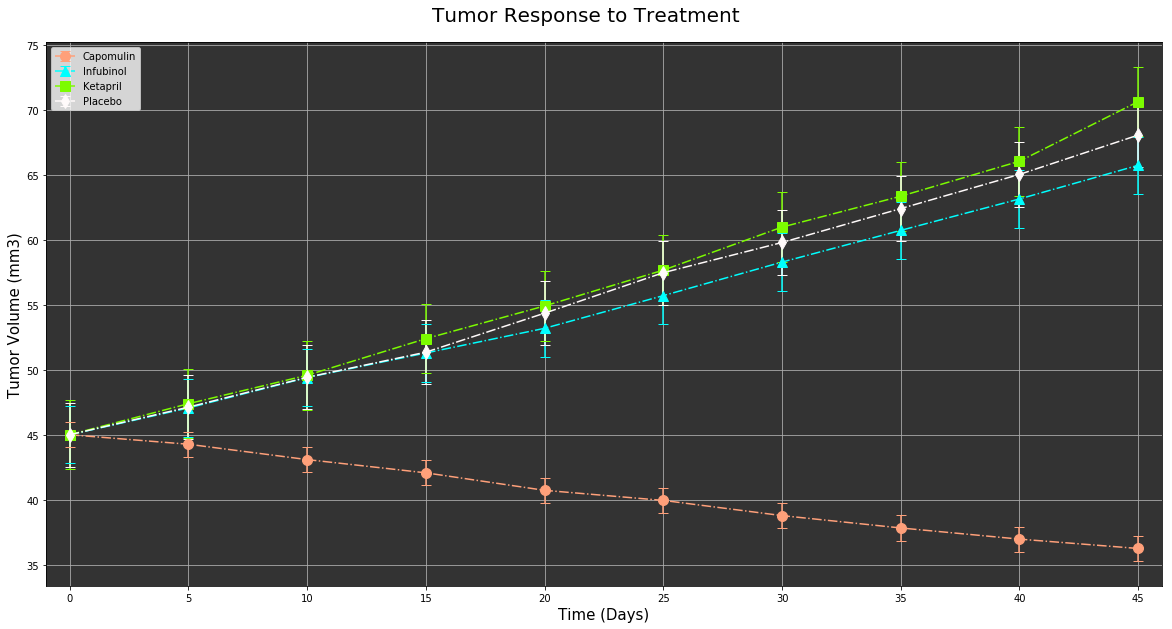

In [6]:
fig, ax1 = plt.subplots(figsize=(20,10))
fig.suptitle("Tumor Response to Treatment",fontsize=20,y=.93)
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
plt.xlim(-1, 46)
ax1.set_xticks(unstacked_noindex["Timepoint"])
ax1.set_axisbelow(True)
ax1.patch.set_facecolor('.2')
ax1.errorbar(unstacked_noindex["Timepoint"], unstacked_noindex["Capomulin"], yerr=Capomulin_sem, fmt='o',ls = '-.',c='lightsalmon',capsize=5,ms=10)
ax1.errorbar(unstacked_noindex["Timepoint"], unstacked_noindex["Infubinol"], yerr=Infubinol_sem, fmt='^',ls = '-.',c='aqua',capsize=5,ms=10)
ax1.errorbar(unstacked_noindex["Timepoint"], unstacked_noindex["Ketapril"], yerr=Ketapril_sem, fmt='s',ls = '-.',c='lawngreen',capsize=5,ms=10)
ax1.errorbar(unstacked_noindex["Timepoint"], unstacked_noindex["Placebo"], yerr=Placebo_sem, fmt='d',ls = '-.',c='snow',capsize=5,ms=10)
plt.grid()
lgnd = plt.legend(loc="upper left")

In [7]:
clinical_mouse_pivotdf = pd.pivot_table(clinical_mouse_df,index=["Drug","Timepoint"])

In [8]:
# Flattening the multi index Dataframe
clinical_mouse_pivotdf2 = clinical_mouse_pivotdf
del clinical_mouse_pivotdf2["Tumor Volume (mm3)"]
unstacked_df2 = clinical_mouse_pivotdf2.unstack()
unstacked_df3 = unstacked_df2.transpose()
unstacked_noindexms = unstacked_df3.reset_index()

In [9]:
# standard error of mean for each drug's metastatic sites
Capomulinms_sem = stats.sem(unstacked_noindexms["Capomulin"])
Infubinolms_sem = stats.sem(unstacked_noindexms["Infubinol"])
Ketaprilms_sem = stats.sem(unstacked_noindexms["Ketapril"])
Placeboms_sem = stats.sem(unstacked_noindexms["Placebo"])

## Metastatic Response to Treatment

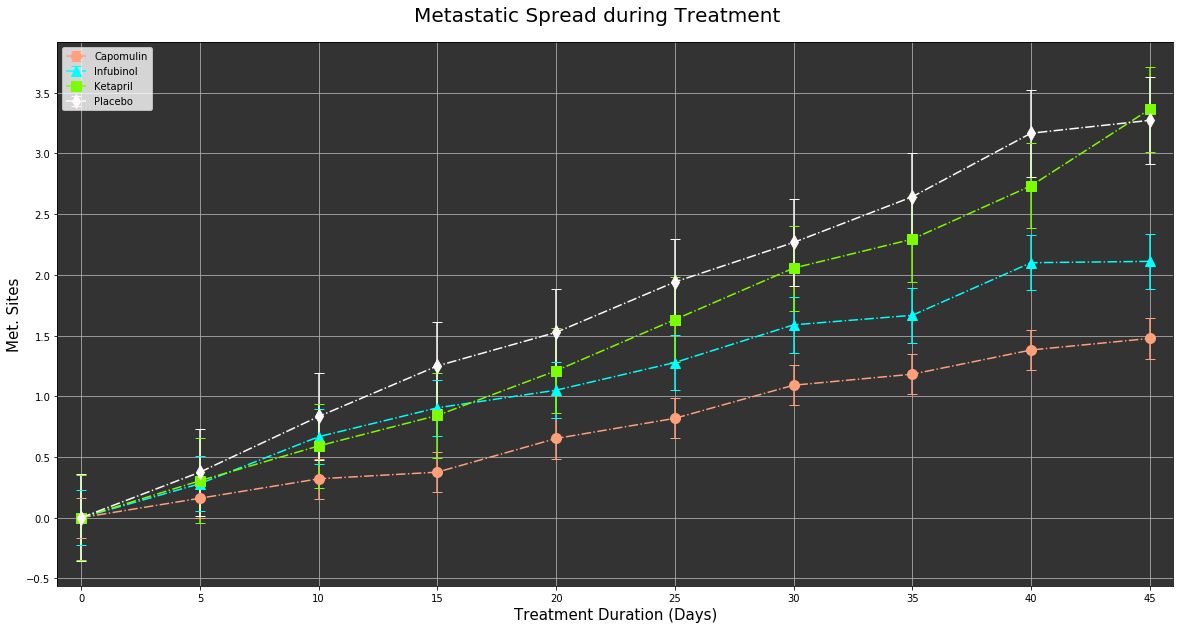

In [10]:
fig, ax1 = plt.subplots(figsize=(20,10))
fig.suptitle("Metastatic Spread during Treatment",fontsize=20,y=.93)
ax1.set_xlabel("Treatment Duration (Days)")
ax1.set_ylabel("Met. Sites")
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
plt.xlim(-1, 46)
ax1.patch.set_facecolor('.2')
ax1.set_xticks(unstacked_noindex["Timepoint"])
ax1.set_axisbelow(True)
ax1.errorbar(unstacked_noindex["Timepoint"], unstacked_noindexms["Capomulin"], yerr=Capomulinms_sem, fmt='o',ls = '-.',ms=10,c='lightsalmon',capsize=5)
ax1.errorbar(unstacked_noindex["Timepoint"], unstacked_noindexms["Infubinol"], yerr=Infubinolms_sem, fmt='^',ls = '-.',c='aqua',capsize=5,ms=10)
ax1.errorbar(unstacked_noindex["Timepoint"], unstacked_noindexms["Ketapril"], yerr=Ketaprilms_sem, fmt='s',ls = '-.',c='lawngreen',capsize=5,ms=10)
ax1.errorbar(unstacked_noindex["Timepoint"], unstacked_noindexms["Placebo"], yerr=Placeboms_sem, fmt='d',ls = '-.',c='snow',capsize=5,ms=10)
plt.grid()
lgnd = plt.legend(loc="upper left")

In [11]:
clinical_mouse_grped = clinical_mouse_df.groupby(["Drug","Timepoint"],as_index=None)
clinical_mouse_count = clinical_mouse_grped.count()
mousecount_df = pd.pivot_table(clinical_mouse_count,index=["Drug","Timepoint"])

In [12]:
# delete redundant columns
del mousecount_df["Metastatic Sites"]
del mousecount_df["Tumor Volume (mm3)"]

In [13]:
testing_df = mousecount_df.reset_index()
testing_df["Percentage"] = testing_df["Mouse ID"]/25
#fixing the anamolies
testing_df.loc[testing_df["Drug"]=="Propriva","Percentage"] = testing_df["Mouse ID"]/26
testing_df.loc[testing_df["Drug"]=="Stelasyn","Percentage"] = testing_df["Mouse ID"]/26

In [14]:
testing_df["Percentage"] = round(testing_df["Percentage"]*100)

## Survival Rates

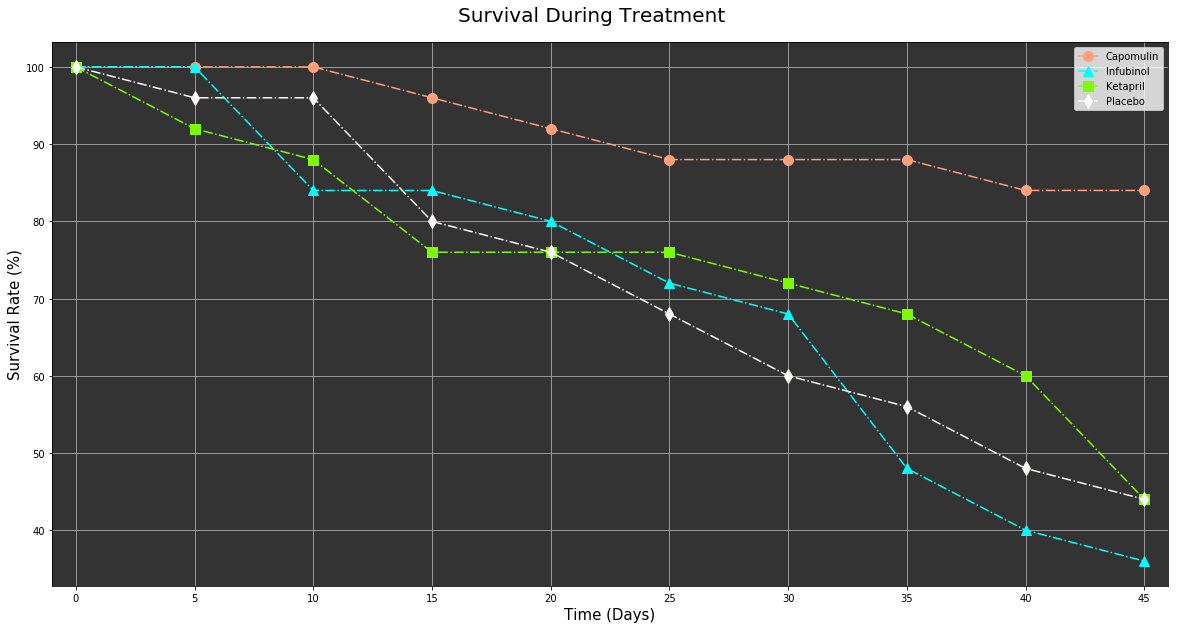

In [15]:
fig, ax1 = plt.subplots(figsize=(20,10))
fig.suptitle("Survival During Treatment",fontsize=20,y=.93)
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Survival Rate (%)")
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)
plt.xlim(-1, 46)
ax1.patch.set_facecolor('.2')
ax1.set_xticks(unstacked_noindex["Timepoint"])
ax1.set_axisbelow(True)
plt.plot(unstacked_noindex["Timepoint"], testing_df.loc[testing_df["Drug"]=="Capomulin","Percentage"], '-.o', color='lightsalmon',label = 'Capomulin',ms=10)
plt.plot(unstacked_noindex["Timepoint"], testing_df.loc[testing_df["Drug"]=="Infubinol","Percentage"], '-.^', color='aqua',label = 'Infubinol',ms=10)
plt.plot(unstacked_noindex["Timepoint"], testing_df.loc[testing_df["Drug"]=="Ketapril","Percentage"], '-.s', color='lawngreen',label = 'Ketapril',ms=10)
plt.plot(unstacked_noindex["Timepoint"], testing_df.loc[testing_df["Drug"]=="Placebo","Percentage"], '-.d', color='snow',label = 'Placebo',ms=10)
plt.grid()
plt.legend(loc="best")
plt.show()

In [16]:
unstacked_tpidx = unstacked_noindex.set_index("Timepoint")

In [17]:
Capomulin_pct = round(((unstacked_tpidx.loc[45,"Capomulin"]-unstacked_tpidx.loc[0,"Capomulin"])/unstacked_tpidx.loc[0,"Capomulin"])*100)
Infubinol_pct = round(((unstacked_tpidx.loc[45,"Infubinol"]-unstacked_tpidx.loc[0,"Infubinol"])/unstacked_tpidx.loc[0,"Infubinol"])*100)
Ketapril_pct = round(((unstacked_tpidx.loc[45,"Ketapril"]-unstacked_tpidx.loc[0,"Ketapril"])/unstacked_tpidx.loc[0,"Ketapril"])*100)
Placebo_pct = round(((unstacked_tpidx.loc[45,"Placebo"]-unstacked_tpidx.loc[0,"Placebo"])/unstacked_tpidx.loc[0,"Placebo"])*100)
percentage_chg_df1 = pd.DataFrame({"Drug":["Capomulin","Infubinol","Ketapril","Placebo"],
                                   "pct":[Capomulin_pct,Infubinol_pct,Ketapril_pct,Placebo_pct]})

## Summary Bar Graph

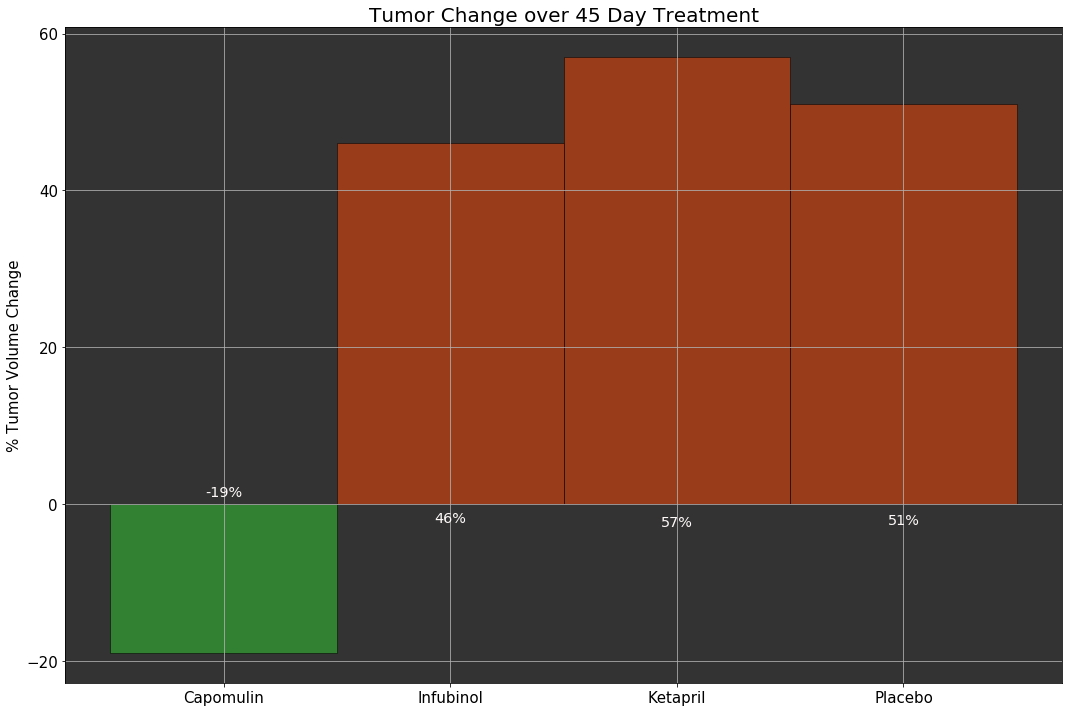

In [18]:
mask1 = percentage_chg_df1["pct"] < 0
mask2 = percentage_chg_df1["pct"] > 0
fig, ax = plt.subplots(figsize=(15,10))

rects1 = ax.bar(percentage_chg_df1["Drug"][mask1], percentage_chg_df1["pct"][mask1], color='limegreen',alpha=0.5, align="center",edgecolor='black',width=1.0)
rects2 = ax.bar(percentage_chg_df1["Drug"][mask2], percentage_chg_df1["pct"][mask2], color='orangered', alpha=0.5, align="center",edgecolor='black',width=1.0)
plt.title("Tumor Change over 45 Day Treatment",fontsize = 20)
plt.ylabel("% Tumor Volume Change",fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks([-20,0,20,40,60],fontsize=15)
ax.patch.set_facecolor('.2')
plt.tight_layout()
plt.grid()
def autolabel(rects):
    """
    Attach a text label
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,-0.05*height,
                '%d%%' % int(height),
                ha='center', va='baseline',size="x-large",color="snow")

autolabel(rects1)
autolabel(rects2)